# 1.初始準備

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 2.引入資料

In [6]:
from sklearn.datasets import load_iris

In [7]:
iris = load_iris()

In [8]:
#print(iris.DESCR)

In [9]:
X = iris.data

In [10]:
Y = iris.target

## 2.1input前處理

In [11]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [12]:
X = X[: , 2:]

In [13]:
X[0]

array([1.4, 0.2])

## 2.2資料分割

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,
                                                    test_size=0.2,
                                                    random_state=87)

# 3.建立SVM

In [16]:
from sklearn.svm import SVC

In [17]:
clf = SVC()

# 4.訓練

In [18]:
clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# 5.測試

In [19]:
y_predict = clf.predict(x_test)

In [20]:
x_test[:,0], x_test[:,1]

(array([1.5, 6.1, 5.3, 6.7, 5.6, 4.7, 1.3, 4.4, 4.5, 4.7, 1.7, 1.4, 1.6,
        5.1, 1.5, 1.4, 1.3, 3.7, 3.8, 1.4, 4.1, 3.9, 6.4, 1.6, 1.5, 1.4,
        1.4, 5.7, 5.5, 4.8]),
 array([0.2, 1.9, 1.9, 2. , 2.2, 1.4, 0.2, 1.3, 1.5, 1.6, 0.3, 0.2, 0.2,
        1.6, 0.1, 0.1, 0.4, 1. , 1.1, 0.2, 1.3, 1.1, 2. , 0.2, 0.2, 0.2,
        0.1, 2.3, 1.8, 1.8]))

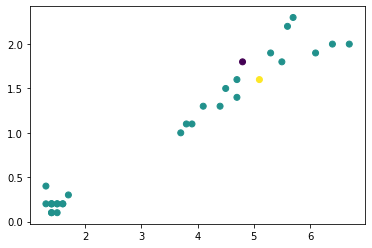

In [20]:
plt.scatter(x_test[:,0], x_test[:,1], c=y_predict - y_test)

## 5.2meshgrid畫圖

In [25]:
x1, x2 = np.meshgrid(np.arange(0,7, 0.02), np.arange(0,3, 0.02))

In [41]:
Z = clf.predict(np.c_[x1.ravel(), x2.ravel()])

In [42]:
x1.shape

(150, 350)

In [43]:
x1.ravel().shape

(52500,)

In [44]:
Z.shape

(52500,)

In [45]:
Z = Z.reshape(x1.shape)

In [46]:
Z.shape

(150, 350)

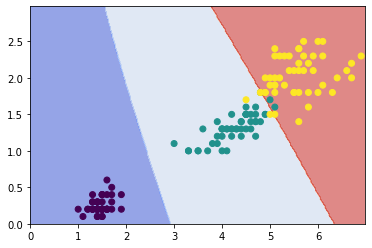

In [47]:
plt.contourf(x1, x2, Z, cmap=plt.cm.coolwarm, alpha=0.6)
plt.scatter(X[:,0], X[:,1], c=Y)

# Others: KMeans分類

In [49]:
XX = np.random.rand(100,2)

In [51]:
XX.shape

(100, 2)

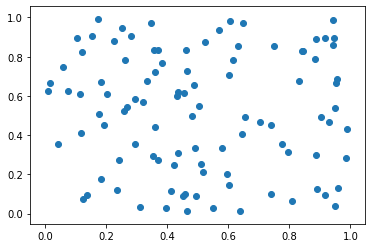

In [53]:
plt.scatter(XX[: , 0], XX[: , 1])

In [54]:
from sklearn.cluster import KMeans

In [55]:
clf = KMeans(n_clusters=3)

In [56]:
clf.fit(XX)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [57]:
clf.labels_

array([0, 0, 2, 0, 1, 0, 0, 2, 2, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2, 2, 1, 2, 1,
       1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 1, 0, 2, 1,
       0, 0, 0, 1, 0, 1, 0, 2, 1, 2, 0, 1, 0, 0, 2, 1, 2, 2, 0, 1, 0, 0,
       2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1])

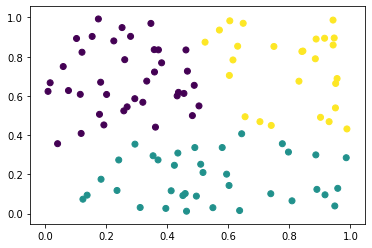

In [58]:
plt.scatter(XX[: , 0], XX[: , 1], c=clf.labels_)